In [17]:
import tensorflow as tf 

In [18]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert to "one-hot" vectors using the to_categorical function
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## API Funcional

In [19]:
input = tf.keras.layers.Input(shape=image_vector_size)

x1 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(input)
x2 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(x1)

output = tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)(x2)


model = tf.keras.Model(input,output)

In [25]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=[tf.keras.metrics.CategoricalCrossentropy()])

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

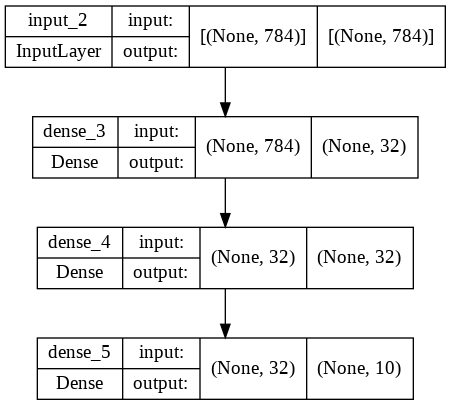

In [23]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [26]:
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=5,
                    batch_size=4)

Epoch 1/5
15000/15000 [==============================] - 30s 2ms/step - loss: 1.2063 - categorical_crossentropy: 1.2063 - val_loss: 0.9900 - val_categorical_crossentropy: 0.9900
Epoch 2/5
15000/15000 [==============================] - 29s 2ms/step - loss: 0.8264 - categorical_crossentropy: 0.8264 - val_loss: 0.7539 - val_categorical_crossentropy: 0.7539
Epoch 3/5
15000/15000 [==============================] - 29s 2ms/step - loss: 0.7385 - categorical_crossentropy: 0.7385 - val_loss: 0.6780 - val_categorical_crossentropy: 0.6780
Epoch 4/5
15000/15000 [==============================] - 27s 2ms/step - loss: 0.6729 - categorical_crossentropy: 0.6729 - val_loss: 0.6981 - val_categorical_crossentropy: 0.6981
Epoch 5/5
15000/15000 [==============================] - 30s 2ms/step - loss: 0.6726 - categorical_crossentropy: 0.6726 - val_loss: 0.6422 - val_categorical_crossentropy: 0.6422


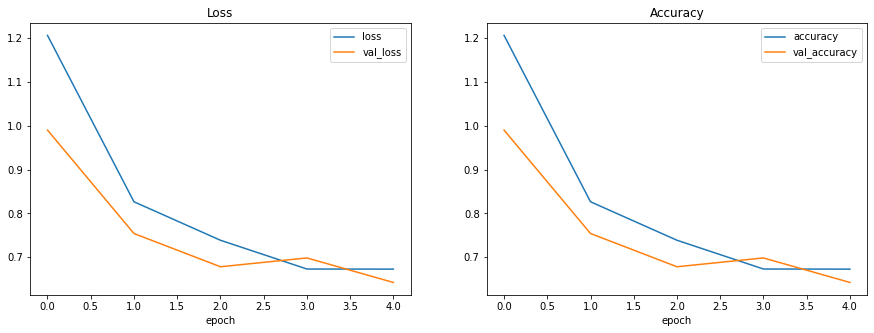

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
accuracy = history.history['categorical_crossentropy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_crossentropy']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch');